In [1]:
import boto3
import pandas as pd
import numpy as np
import io
from io import StringIO
from sklearn.preprocessing import normalize
import skbio.diversity
# from skbio.diversity import alpha_diversity
# from skbio import TreeNode

In [2]:
s3 = boto3.resource('s3')
S3_client = boto3.client('s3')
bucket = "siwaexperiments"
bucket_s3= s3.Bucket(bucket)

In [3]:
kit_obj = S3_client.get_object(Bucket=bucket, Key="E347/E347_kits.csv")
kit_data = kit_obj['Body'].read()
kit_df = pd.read_csv(io.BytesIO(kit_data), sep=',')
kit_df

,KitID,Age,Treatment,TreatmentNumber,ProjectID,Farm,FarmLocation,Client,ExternalClient,AnimalType,FirstSamplingDate,Country,GeneticLine
0,115,42.0,Na0.10CI0.23,1.0,E341,ExperimentalFarm_Fredonia,NaN,innovation_labs,innovation_labs,Broilers,NaN,colombia,Ross308AP
1,116,42.0,Na0.16CI0.25,2.0,E341,ExperimentalFarm_Fredonia,NaN,innovation_labs,innovation_labs,Broilers,NaN,colombia,Ross308AP
2,117,42.0,Na0.22CI0.25,3.0,E341,ExperimentalFarm_Fredonia,NaN,innovation_labs,innovation_labs,Broilers,NaN,colombia,Ross308AP
3,118,42.0,Na0.28CI0.25,4.0,E341,ExperimentalFarm_Fredonia,NaN,innovation_labs,innovation_labs,Broilers,NaN,colombia,Ross308AP
4,119,42.0,Na0.34CI0.25,5.0,E341,ExperimentalFarm_Fredonia,NaN,innovation_labs,innovation_labs,Broilers,NaN,colombia,Ross308AP
5,120,42.0,Na0.40CI0.25,6.0,E341,ExperimentalFarm_Fredonia,NaN,innovation_labs,innovation_labs,Broilers,NaN,colombia,Ross308AP
6,121,42.0,Na0.22CI0.42,7.0,E341,ExperimentalFarm_Fredonia,NaN,innovation_labs,innovation_labs,Broilers,NaN,colombia,Ross308AP
7,122,42.0,Na0.28CI0.52,8.0,E341,ExperimentalFarm_Fredonia,NaN,innovation_labs,innovation_labs,Broilers,NaN,colombia,Ross308AP
8,123,42.0,Na0.34CI0.61,9.0,E341,ExperimentalFarm_Fredonia,NaN,innovation_labs,innovation_labs,Broilers,NaN,colombia,Ross308AP
9,124,42.0,Na0.40CI0.71,10.0,E341,ExperimentalFarm_Fredonia,NaN,innovation_labs,innovation_labs,Broilers,NaN,colombia,Ross308AP


In [5]:
animal_obj = S3_client.get_object(Bucket=bucket, Key='E347/E347_animals.csv')
animal_data = animal_obj['Body'].read()
animal_df = pd.read_csv(io.BytesIO(animal_data), sep=',')
animal_df

,SampleID,Pen,House,AnimalID,KitID,Identifier,Sex,ProjectID
0,0115_01I-M,6,1,0115_01,115,0115_01,M,E347
1,0115_02I-M,28,1,0115_02,115,0115_02,M,E347
2,0115_03I-M,14,2,0115_03,115,0115_03,M,E347
3,0115_04I-M,40,2,0115_04,115,0115_04,M,E347
4,0116_05I-M,2,3,0116_05,116,0116_05,M,E347
...,...,...,...,...,...,...,...,...
75,0124_04I-M,30,2,0124_04,124,0124_04,M,E347
76,0124_05I-M,10,3,0124_05,124,0124_05,M,E347
77,0124_06I-M,24,3,0124_06,124,0124_06,M,E347
78,0124_07I-M,18,4,0124_07,124,0124_07,M,E347


In [8]:
raw_obj = S3_client.get_object(Bucket=bucket, Key='E347/raw.xlsx')
raw_data = raw_obj['Body'].read()
raw_df = pd.read_excel(io.BytesIO(raw_data))
raw_df

,Trts,Rep/Trt,Starter (8-21d),Unnamed: 3,Unnamed: 4,Grower (22 - 42d),Unnamed: 6,Unnamed: 7
0,NaN,NaN,% Feed restiction,% Na,% Cl,% Feed restiction,% Na,% Cl
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 **,16.0,30,0.1,0.159,30,0.1,0.23
4,2 **,16.0,30,0.16,0.245,30,0.16,0.25
5,3,16.0,30,0.22,0.250,30,0.22,0.25
6,4,16.0,30,0.28,0.250,30,0.28,0.25
7,5,16.0,30,0.34,0.250,30,0.34,0.25
8,6,16.0,30,0.4,0.250,30,0.4,0.25
9,7,16.0,30,0.22,0.331*,30,0.22,0.42*


In [10]:
import pandas as pd


# Unir los DataFrames utilizando KitID como clave
merged_df = pd.merge(animal_df, kit_df, on='KitID', how='inner')

# Unir el DataFrame combinado con el archivo raw utilizando SampleID como clave
final_df = pd.merge(merged_df, raw_df, left_on='SampleID', right_on='Trts', how='inner')

# Mostrar el DataFrame final
print(final_df)

Empty DataFrame
Columns: [SampleID, Pen, House, AnimalID, KitID, Identifier, Sex, ProjectID_x, Age, Treatment, TreatmentNumber, ProjectID_y, Farm, FarmLocation, Client, ExternalClient, AnimalType, FirstSamplingDate, Country, GeneticLine, Trts, Rep/Trt, Starter (8-21d), Unnamed: 3, Unnamed: 4, Grower (22 - 42d), Unnamed: 6, Unnamed: 7]
Index: []

[0 rows x 28 columns]


In [10]:
def get_dict_level(Level, TaxaDataframe):
    """Return dict. Keys are the unique taxa names for that level and values are lists of the otus for that name.
    TaxaDataframe must have OTU as column."""
    level_uniques = list(TaxaDataframe[Level].unique())
    dict_level_otus = dict(
        zip(
            level_uniques,
            [
                list(set(TaxaDataframe[TaxaDataframe[Level] == i].OTU))
                for i in level_uniques
            ],
        )
    )
    return dict_level_otus

In [11]:
def get_experiment(META, DF, TAXA, ExperimentID):
    """Get the dataframes for the experiment in the same order as the input.
    df_meta column Project
    """
    meta_experiment = META[META.Project == ExperimentID]
    print("Number of samples for that experiment {}".format(meta_experiment.shape[0]))
    samples = list(meta_experiment.SampleID)
    samples = [i for i in samples if i in DF.columns]  # verificar que tengan microbiome
    print("Number of samples with microbiome {}".format(len(samples)))
    if (
        not meta_experiment[meta_experiment.duplicated(subset=["SampleID"])].shape[0]
        > 0
    ):
        samples.append("OTU")
        DF_subset = DF[samples]
        print("Total shape OTUS subset {}".format((DF_subset.shape)))
        DF_subset = DF_subset[DF_subset.drop("OTU", axis=1).sum(axis=1) >= 1]
        print("After removing zero counts {}".format(DF_subset.shape))
        TAXA_subset = TAXA[TAXA.OTU.isin(list(DF_subset.OTU))]
        print("Taxa size {}".format(TAXA_subset.shape))
        return [meta_experiment, DF_subset, TAXA_subset]
    else:
        print("OJO: DUPLICADOS!")


In [12]:
def convert_relative(otus_table_df):
    """otus_table_df must have OTU as column."""
    otus_table_df = otus_table_df.fillna(0)
    otus = list(otus_table_df.OTU)
    otus_table_df.index = otus
    otus_table_df = otus_table_df.drop("OTU", axis=1)
    samples = list(otus_table_df.columns)
    df_norm = pd.DataFrame(normalize(otus_table_df.values.T, axis=1, norm="l1").T)
    df_norm.columns = samples
    df_norm.index = otus
    print("OTUS are index")
    return df_norm

In [13]:
dfotu = convert_relative(df_otus)
dfotu

NameError: name 'df_otus' is not defined

In [ ]:
def aggregate_taxa(Level, TaxaDataframe, OTUDataframe):
    """OTUDataframe must have OTUs as INDEX, not column.
    TaxaDataframe must have OTU as column."""
    dict_agg = get_dict_level(Level, TaxaDataframe)
    return pd.DataFrame.from_dict(
        {
            key: list(
                OTUDataframe.loc[
                    dict_agg[key],
                ].sum(axis=0, skipna=True)
            )
            for key in dict_agg.keys()
        },
        orient="index",
        columns=OTUDataframe.columns,
    )

In [ ]:
def ratio1(
    df_otus,
    df_taxa,
    level="Genus",
    taxas=["Lactobacillus", "Escherichia-Shigella"],
    indexname="ratio1",
):
    """Ratio and log of ratio between two taxas of the same taxonomy level."""
    if taxas[0] in df_taxa[level].unique() and taxas[1] in df_taxa[level].unique():
        dfRelative = convert_relative(df_otus)
        df_agg = aggregate_taxa(level, df_taxa, dfRelative)
        df_taxa0_taxa1 = df_agg.loc[
            taxas,
        ]
        taxa_den = taxas[1]
        taxa_num = taxas[0]
        min_deno = np.min(df_taxa0_taxa1.loc[taxa_den])
        min_num = np.min(df_taxa0_taxa1.loc[taxa_num])
        if min_deno == 0:  ### Corregir denominador cero
            print("Corregir denominador")
            samples_zero_den = list(
                df_taxa0_taxa1.columns[df_taxa0_taxa1.loc[taxa_den] == min_deno]
            )
            second_last_den = [
                i for i in sorted(df_taxa0_taxa1.loc[taxa_den]) if i != 0
            ][0]
            # print(second_last_den)
            df_taxa0_taxa1.loc[taxa_den, samples_zero_den] = second_last_den
        if min_num == 0:  ### Corregir denominador cero
            print("Corregir numerador")
            samples_zero_num = list(
                df_taxa0_taxa1.columns[df_taxa0_taxa1.loc[taxa_num] == min_num]
            )
            second_last_num = [
                i for i in sorted(df_taxa0_taxa1.loc[taxa_num]) if i != 0
            ][0]
            # print(second_last_num)
            df_taxa0_taxa1.loc[taxa_num, samples_zero_num] = second_last_num

        df_taxa0_taxa1.loc[indexname] = (
            df_taxa0_taxa1.loc[taxas[0]] / df_taxa0_taxa1.loc[taxas[1]]
        )
        df_taxa0_taxa1.loc["{}LOG".format(indexname)] = df_taxa0_taxa1.loc[
            indexname
        ].apply(lambda x: np.log(x))
        return df_taxa0_taxa1
    else:
        print("At least one taxa not found in {} level.".format(level))
        return None


In [ ]:
def ratio3(df_otus, df_taxa, level="Genus", taxa="Lactobacillus"):
    """One taxa vs others."""
    if taxa in df_taxa[level].unique():
        dfRelative = convert_relative(df_otus)
        df_agg = aggregate_taxa(level, df_taxa, dfRelative)
        series_taxa = df_agg.loc[
            taxa,
        ]
        series_rest = (
            df_agg.loc[
                df_agg.index != taxa,
            ]
            .sum(axis=0, skipna=True)
            .rename("Others")
        )
        df_ratio3 = pd.concat([series_taxa, series_rest], axis=1).T
        min_num = np.min(df_ratio3.loc[taxa])
        if min_num == 0:  ### Corregir denominador cero
            print("Corregir numerador")
            samples_zero_num = list(df_ratio3.columns[df_ratio3.loc[taxa] == min_num])
            second_last_num = [i for i in sorted(df_ratio3.loc[taxa]) if i != 0][0]
            print(second_last_num)
            df_ratio3.loc[taxa, samples_zero_num] = second_last_num
        df_ratio3.loc["ratio3"] = df_ratio3.loc[taxa] / df_ratio3.loc["Others"]
        df_ratio3.loc["ratio3LOG"] = df_ratio3.loc["ratio3"].apply(lambda x: np.log(x))

        return df_ratio3
    else:
        print("Taxa not found in {} level.".format(level))
        return None


In [ ]:
otu_df.columns
meta_df[meta_df.Project == "E347"]

,SampleID,BarcodeSequence,KitID,TreatmentNumber,Treatment,Age,AnimalNumber,SampleLocation,AnalysisType,AnimalType,Project,Client,Pen,House,LinkerPrimerSequence,BarcodePlate,Well,Description,Alfa_Shannon,Alfa_Observed
0,0115_01C-M,CAATTCTGCTTC,115,1.0,Na0.10CI0.23,42.0,1.0,C,M,Broiler,E347,Iluma,6.0,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A1,0115_01C-M,5.570814,101
1,0115_02C-M,GTTATACATTCA,115,1.0,Na0.10CI0.23,42.0,2.0,C,M,Broiler,E347,Iluma,28.0,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A2,0115_02C-M,4.892334,74
2,0115_03C-M,GATGTCATAGCC,115,1.0,Na0.10CI0.23,42.0,3.0,C,M,Broiler,E347,Iluma,14.0,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A3,0115_03C-M,4.746524,103
3,0115_04C-M,CGTGACAATAGT,115,1.0,Na0.10CI0.23,42.0,4.0,C,M,Broiler,E347,Iluma,40.0,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A4,0115_04C-M,5.758773,118
4,0116_05C-M,GAGGGCGTGATC,116,2.0,Na0.16CI0.25,42.0,5.0,C,M,Broiler,E347,Iluma,2.0,3.0,GTGTGYCAGCMGCCGCGGTAA,13,A5,0116_05C-M,4.503650,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0124_02I-M,TACATATCTACA,124,10.0,Na0.40CI0.71,42.0,2.0,I,M,Broiler,E347,Iluma,23.0,1.0,GTGTGYCAGCMGCCGCGGTAA,15,G8,0124_02I-M,2.896228,57
175,0124_03I-M,TCTAGGTTATTC,124,10.0,Na0.40CI0.71,42.0,3.0,I,M,Broiler,E347,Iluma,13.0,2.0,GTGTGYCAGCMGCCGCGGTAA,15,G9,0124_03I-M,2.716216,57
176,0124_04I-M,TGTCTACATACT,124,10.0,Na0.40CI0.71,42.0,4.0,I,M,Broiler,E347,Iluma,30.0,2.0,GTGTGYCAGCMGCCGCGGTAA,15,G10,0124_04I-M,2.687629,62
177,0124_05I-M,GCCGCTCTTTGG,124,10.0,Na0.40CI0.71,42.0,5.0,I,M,Broiler,E347,Iluma,10.0,3.0,GTGTGYCAGCMGCCGCGGTAA,15,G11,0124_05I-M,2.173903,13


In [ ]:
list_exp = get_experiment(meta_df, otu_df, tax_df, "E347")

Number of samples for that experiment 179
Number of samples with microbiome 179
Total shape OTUS subset (5226, 180)
After removing zero counts (1977, 180)
Taxa size (1977, 9)


In [ ]:
list_exp[0].to_csv("data/metadata_E347.csv", header=True, index=False)
list_exp[1].to_csv("data/otus_E347.csv", header=True, index=False)
list_exp[2].to_csv("data/taxonomy_E347.csv", header=True, index=False)

In [ ]:
TAXA = list_exp[2]
OTUS = list_exp[1]
df_ratio1 = ratio1(OTUS, TAXA)
df_ratio2 = ratio1(OTUS, TAXA, level="Phylum", taxas=["Firmicutes", "Proteobacteria"], indexname="ratio2")
df_ratio3 = ratio3(OTUS, TAXA)

OTUS are index
Corregir denominador
OTUS are index
Corregir denominador
OTUS are index


In [ ]:
df_123 = pd.concat([df_ratio1,df_ratio2, df_ratio3], axis=0).loc[["ratio1LOG", "ratio2LOG", "ratio3LOG"]]
df_123 = df_123.transpose()
df_123["SampleID"] = df_123.index
df_123.head()

,ratio1LOG,ratio2LOG,ratio3LOG,SampleID
0115_01C-M,1.618213,3.106179,-1.445178,0115_01C-M
0115_02C-M,2.716784,2.769024,-0.474775,0115_02C-M
0115_03C-M,0.110712,2.805703,-3.940691,0115_03C-M
0115_04C-M,0.583749,1.224999,-3.193350,0115_04C-M
0116_05C-M,0.987387,4.716264,-4.531123,0116_05C-M


In [ ]:
df_metadata = list_exp[0]
df_metadata = pd.merge(
        left=df_metadata,
        right=df_123,
        how="left",
        on="SampleID",copy=False
    )
df_metadata.head()
df_metadata.to_csv("data/metadata_E347.csv", header=True, index=False)

In [ ]:
df_metadata

,SampleID,BarcodeSequence,KitID,TreatmentNumber,Treatment,Age,AnimalNumber,SampleLocation,AnalysisType,AnimalType,...,House,LinkerPrimerSequence,BarcodePlate,Well,Description,Alfa_Shannon,Alfa_Observed,ratio1LOG,ratio2LOG,ratio3LOG
0,0115_01C-M,CAATTCTGCTTC,115,1.0,Na0.10CI0.23,42.0,1.0,C,M,Broiler,...,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A1,0115_01C-M,5.570814,101,1.618213,3.106179,-1.445178
1,0115_02C-M,GTTATACATTCA,115,1.0,Na0.10CI0.23,42.0,2.0,C,M,Broiler,...,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A2,0115_02C-M,4.892334,74,2.716784,2.769024,-0.474775
2,0115_03C-M,GATGTCATAGCC,115,1.0,Na0.10CI0.23,42.0,3.0,C,M,Broiler,...,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A3,0115_03C-M,4.746524,103,0.110712,2.805703,-3.940691
3,0115_04C-M,CGTGACAATAGT,115,1.0,Na0.10CI0.23,42.0,4.0,C,M,Broiler,...,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A4,0115_04C-M,5.758773,118,0.583749,1.224999,-3.193350
4,0116_05C-M,GAGGGCGTGATC,116,2.0,Na0.16CI0.25,42.0,5.0,C,M,Broiler,...,3.0,GTGTGYCAGCMGCCGCGGTAA,13,A5,0116_05C-M,4.503650,69,0.987387,4.716264,-4.531123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0124_02I-M,TACATATCTACA,124,10.0,Na0.40CI0.71,42.0,2.0,I,M,Broiler,...,1.0,GTGTGYCAGCMGCCGCGGTAA,15,G8,0124_02I-M,2.896228,57,5.019363,5.244012,-0.263935
175,0124_03I-M,TCTAGGTTATTC,124,10.0,Na0.40CI0.71,42.0,3.0,I,M,Broiler,...,2.0,GTGTGYCAGCMGCCGCGGTAA,15,G9,0124_03I-M,2.716216,57,-2.257514,-0.880712,-2.731836
176,0124_04I-M,TGTCTACATACT,124,10.0,Na0.40CI0.71,42.0,4.0,I,M,Broiler,...,2.0,GTGTGYCAGCMGCCGCGGTAA,15,G10,0124_04I-M,2.687629,62,4.711114,4.734802,0.692398
177,0124_05I-M,GCCGCTCTTTGG,124,10.0,Na0.40CI0.71,42.0,5.0,I,M,Broiler,...,3.0,GTGTGYCAGCMGCCGCGGTAA,15,G11,0124_05I-M,2.173903,13,6.891672,7.609720,0.135025


C:\Users\judmo\AppData\Local\Temp\ipykernel_7144\1695823635.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SampleLocation', y='Alfa_Shannon', data=df, palette=palette, linewidth=2)


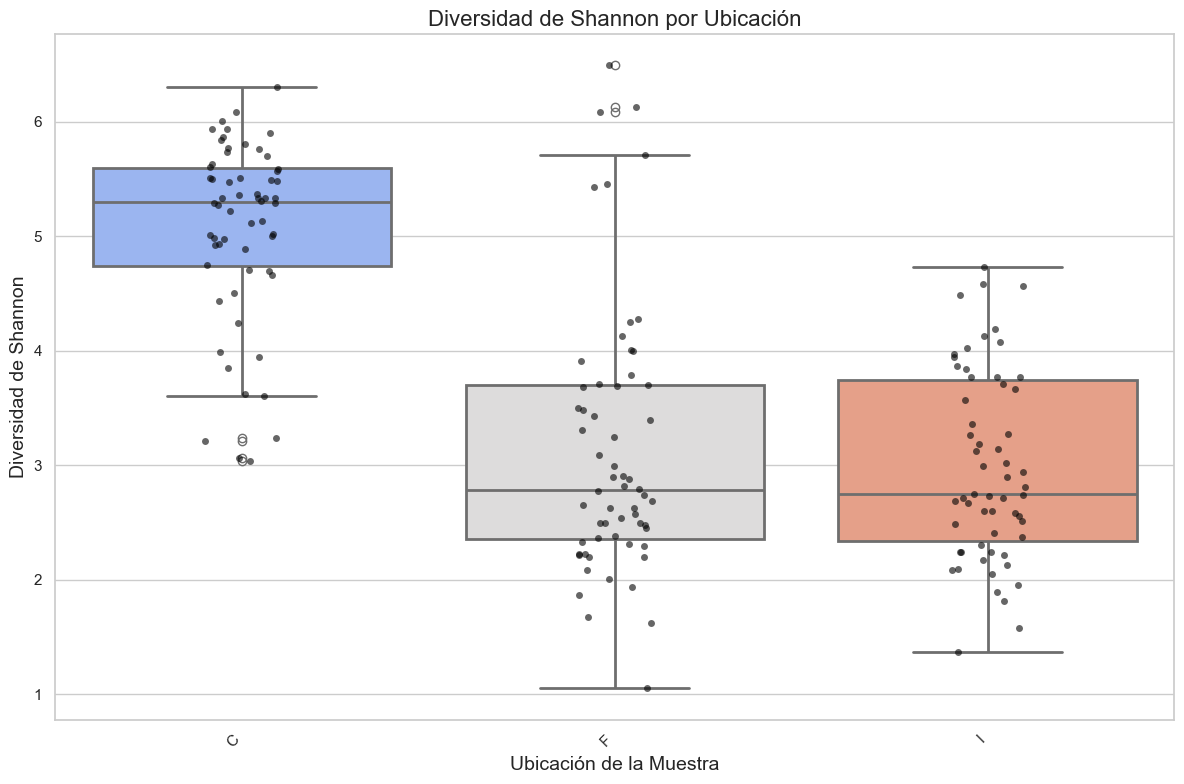

C:\Users\judmo\AppData\Local\Temp\ipykernel_7144\1695823635.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SampleLocation', y='Alfa_Observed', data=df, palette=palette, linewidth=2)


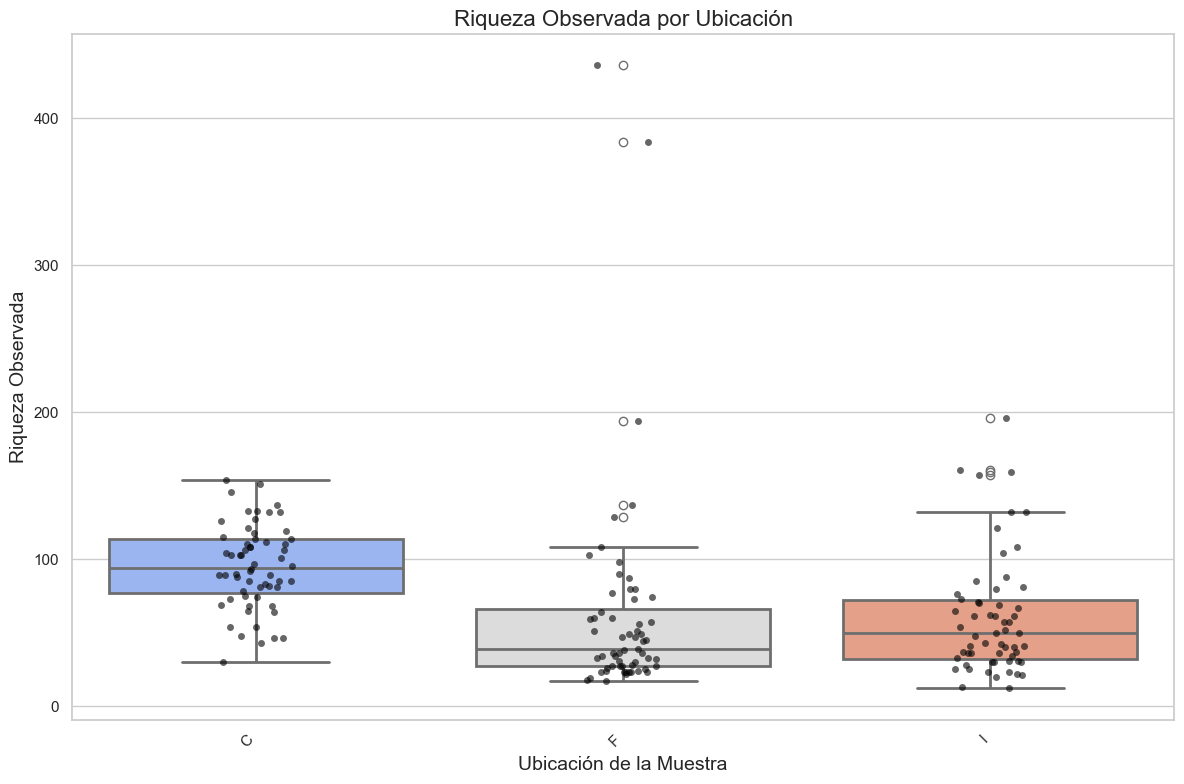

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/metadata_E347.csv')

# Configuración estética de seaborn
sns.set(style="whitegrid")

# Mejorando la paleta de colores
palette = sns.color_palette("coolwarm", n_colors=len(df['SampleLocation'].unique()))

# Boxplot para Alfa_Shannon
plt.figure(figsize=(12, 8))
sns.boxplot(x='SampleLocation', y='Alfa_Shannon', data=df, palette=palette, linewidth=2)
sns.stripplot(x='SampleLocation', y='Alfa_Shannon', data=df, color='black', jitter=True, alpha=0.6)
plt.title('Diversidad de Shannon por Ubicación', fontsize=16)
plt.xlabel('Ubicación de la Muestra', fontsize=14)
plt.ylabel('Diversidad de Shannon', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Boxplot para Alfa_Observed
plt.figure(figsize=(12, 8))
sns.boxplot(x='SampleLocation', y='Alfa_Observed', data=df, palette=palette, linewidth=2)
sns.stripplot(x='SampleLocation', y='Alfa_Observed', data=df, color='black', jitter=True, alpha=0.6)
plt.title('Riqueza Observada por Ubicación', fontsize=16)
plt.xlabel('Ubicación de la Muestra', fontsize=14)
plt.ylabel('Riqueza Observada', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['SampleID', 'BarcodeSequence', 'KitID', 'TreatmentNumber', 'Treatment',
       'Age', 'AnimalNumber', 'SampleLocation', 'AnalysisType', 'AnimalType',
       'Project', 'Client', 'Pen', 'House', 'LinkerPrimerSequence',
       'BarcodePlate', 'Well', 'Description', 'Alfa_Shannon', 'Alfa_Observed',
       'ratio1LOG', 'ratio2LOG', 'ratio3LOG'],
      dtype='object')

C:\Users\judmo\AppData\Local\Temp\ipykernel_7144\333013247.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diversity_cols[['Alfa_Shannon', 'Alfa_Observed']] = diversity_cols[['Alfa_Shannon', 'Alfa_Observed']].apply(pd.to_numeric, errors='coerce')


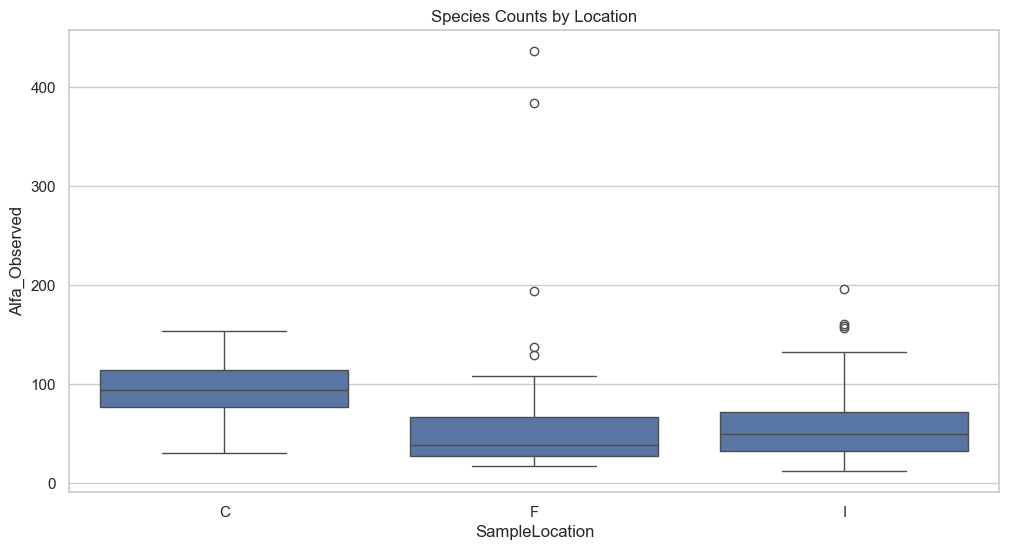

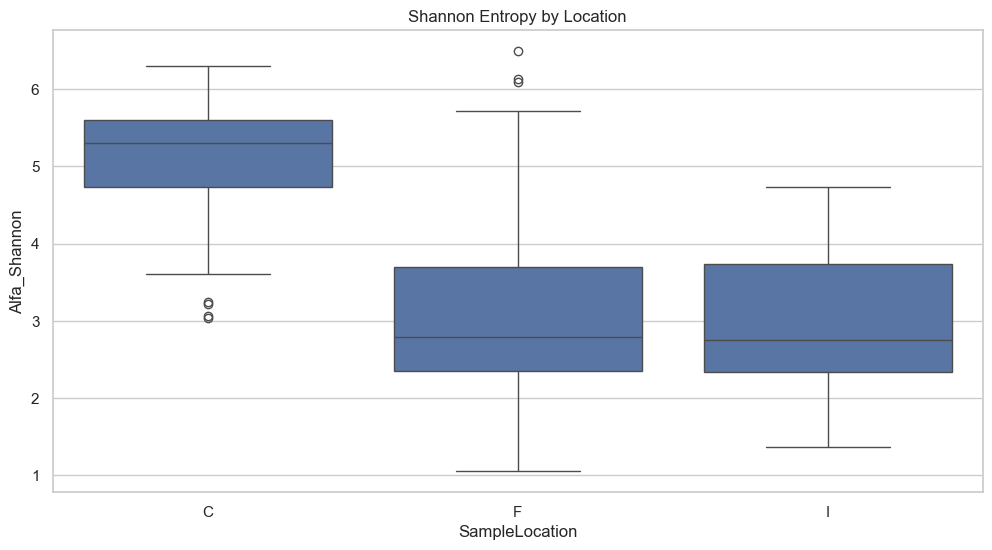

In [ ]:
import pandas as pd
import skbio
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tus datos ya están en un DataFrame llamado df

# Selecciona las columnas relevantes para el cálculo de diversidad
diversity_cols = df[['Alfa_Shannon', 'Alfa_Observed', 'SampleLocation']]

# Convierte las columnas numéricas a tipo numérico
diversity_cols[['Alfa_Shannon', 'Alfa_Observed']] = diversity_cols[['Alfa_Shannon', 'Alfa_Observed']].apply(pd.to_numeric, errors='coerce')

# Calcula la riqueza de especies y el índice de Shannon para cada muestra
species_counts = diversity_cols.groupby('SampleLocation')['Alfa_Observed'].mean().reset_index(name='MeanSpeciesCounts')

shannon_entropy = diversity_cols.groupby('SampleLocation')['Alfa_Shannon'].mean().reset_index(name='MeanShannonEntropy')

# Visualización en boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='SampleLocation', y='Alfa_Observed', data=diversity_cols)
plt.title('Species Counts by Location')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='SampleLocation', y='Alfa_Shannon', data=diversity_cols)
plt.title('Shannon Entropy by Location')
plt.show()


c:\Users\judmo\miniconda3\Lib\site-packages\skbio\diversity\alpha\_base.py:869: RuntimeWarning: invalid value encountered in divide
  freqs = counts / counts.sum()


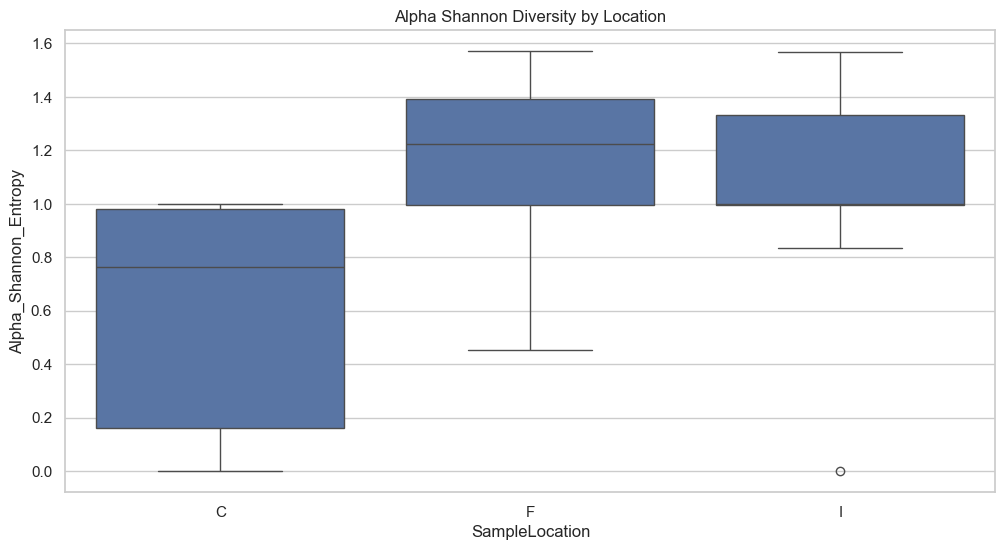

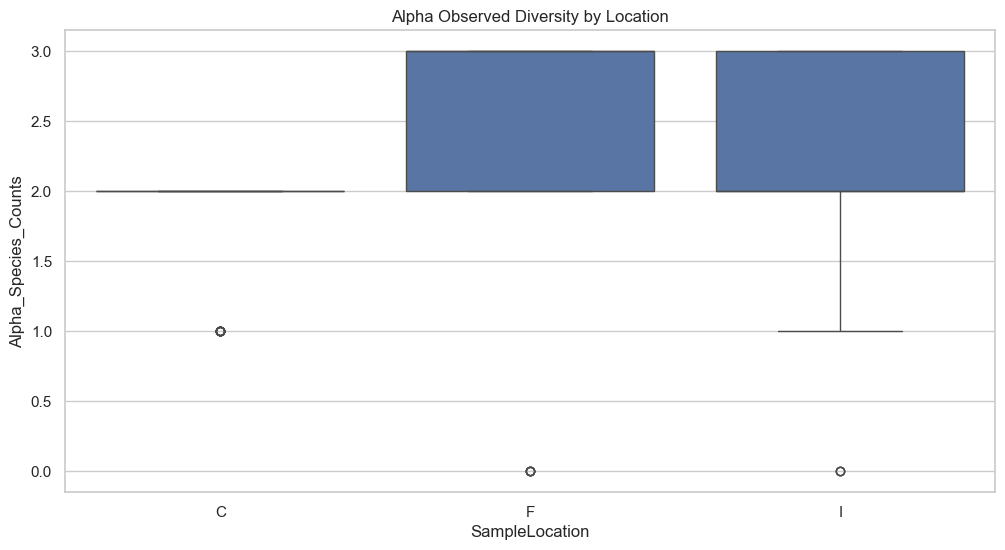

In [ ]:
import pandas as pd
import skbio
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame se llama 'df'

# Seleccionamos las columnas relevantes para el cálculo de diversidad alfa
diversity_cols = df[['SampleLocation', 'ratio1LOG', 'ratio2LOG', 'ratio3LOG']]

# Convierte las columnas numéricas a tipo numérico
diversity_cols.iloc[:, 1:] = diversity_cols.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Asegúrate de que no haya valores negativos en las columnas
diversity_cols.iloc[:, 1:] = diversity_cols.iloc[:, 1:].clip(lower=0)

# Calcula la riqueza de especies para cada muestra
species_counts = diversity_cols.iloc[:, 1:].apply(lambda x: skbio.diversity.alpha.observed_otus(x), axis=1)

# Calcula el índice de Shannon para cada muestra
shannon_entropy = diversity_cols.iloc[:, 1:].apply(lambda x: skbio.diversity.alpha.shannon(x), axis=1)

# Agrega los resultados al DataFrame
df['Alpha_Species_Counts'] = species_counts
df['Alpha_Shannon_Entropy'] = shannon_entropy

# Visualizamos la distribución de Alpha Shannon por ubicación
plt.figure(figsize=(12, 6))
sns.boxplot(x='SampleLocation', y='Alpha_Shannon_Entropy', data=df)
plt.title('Alpha Shannon Diversity by Location')
plt.show()

# Visualizamos la distribución de Alpha Observed por ubicación
plt.figure(figsize=(12, 6))
sns.boxplot(x='SampleLocation', y='Alpha_Species_Counts', data=df)
plt.title('Alpha Observed Diversity by Location')
plt.show()


In [ ]:
diversity_cols

,SampleLocation,ratio1LOG,ratio2LOG,ratio3LOG
0,C,1.618213,3.106179,0.000000
1,C,2.716784,2.769024,0.000000
2,C,0.110712,2.805703,0.000000
3,C,0.583749,1.224999,0.000000
4,C,0.987387,4.716264,0.000000
...,...,...,...,...
174,I,5.019363,5.244012,0.000000
175,I,0.000000,0.000000,0.000000
176,I,4.711114,4.734802,0.692398
177,I,6.891672,7.609720,0.135025


In [ ]:
df

,SampleID,BarcodeSequence,KitID,TreatmentNumber,Treatment,Age,AnimalNumber,SampleLocation,AnalysisType,AnimalType,...,BarcodePlate,Well,Description,Alfa_Shannon,Alfa_Observed,ratio1LOG,ratio2LOG,ratio3LOG,Alpha_Species_Counts,Alpha_Shannon_Entropy
0,0115_01C-M,CAATTCTGCTTC,115,1.0,Na0.10CI0.23,42.0,1.0,C,M,Broiler,...,13,A1,0115_01C-M,5.570814,101,1.618213,3.106179,-1.445178,2,0.927213
1,0115_02C-M,GTTATACATTCA,115,1.0,Na0.10CI0.23,42.0,2.0,C,M,Broiler,...,13,A2,0115_02C-M,4.892334,74,2.716784,2.769024,-0.474775,2,0.999935
2,0115_03C-M,GATGTCATAGCC,115,1.0,Na0.10CI0.23,42.0,3.0,C,M,Broiler,...,13,A3,0115_03C-M,4.746524,103,0.110712,2.805703,-3.940691,2,0.232867
3,0115_04C-M,CGTGACAATAGT,115,1.0,Na0.10CI0.23,42.0,4.0,C,M,Broiler,...,13,A4,0115_04C-M,5.758773,118,0.583749,1.224999,-3.193350,2,0.907332
4,0116_05C-M,GAGGGCGTGATC,116,2.0,Na0.16CI0.25,42.0,5.0,C,M,Broiler,...,13,A5,0116_05C-M,4.503650,69,0.987387,4.716264,-4.531123,2,0.664781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0124_02I-M,TACATATCTACA,124,10.0,Na0.40CI0.71,42.0,2.0,I,M,Broiler,...,15,G8,0124_02I-M,2.896228,57,5.019363,5.244012,-0.263935,2,0.999654
175,0124_03I-M,TCTAGGTTATTC,124,10.0,Na0.40CI0.71,42.0,3.0,I,M,Broiler,...,15,G9,0124_03I-M,2.716216,57,-2.257514,-0.880712,-2.731836,0,NaN
176,0124_04I-M,TGTCTACATACT,124,10.0,Na0.40CI0.71,42.0,4.0,I,M,Broiler,...,15,G10,0124_04I-M,2.687629,62,4.711114,4.734802,0.692398,3,1.291230
177,0124_05I-M,GCCGCTCTTTGG,124,10.0,Na0.40CI0.71,42.0,5.0,I,M,Broiler,...,15,G11,0124_05I-M,2.173903,13,6.891672,7.609720,0.135025,3,1.064634
